프로그래밍3

201984051 신동진

*  각 대륙마다 평균 출산율을 보고싶어 전세계 출산율 데이터를 수렴하였습니다.
현재 우리나라의 출산율이 심각한 수준으로 다가왔고 점점 고령화되는 시대에 노인의 비율이 높아지고 있습니다. 여기서 과연 대한민국 외에 다른 나라도 우리처럼 출산율이 적은지 또 이 데이터를 봤을 때 우리나라처럼 출산을 지향하고 있을지 궁금해서 데이터를 탐색하고 시각화하여 한눈에 보기 쉽게 전세계의 출산율을 알아보고자 합니다.

데이터는 KOSIS에서 출산율 데이터를 가져왔습니다.

In [ ]:
pandas를 불러오고 나중에 사용할 seaborn을 세팅해놉니다.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

pd.read_csv를 통해 출산율 데이터를 불러옵니다

In [18]:
birth = pd.read_csv('birth.csv',encoding='cp949')   
birth

,continent,country,2014,2015,2016,2017,2018
0,Asia,Korea,1.205,1.239,1.172,1.052,0.977
1,Asia,Azerbaijan,1.970,1.940,1.900,1.750,1.730
2,Asia,Bahrain,2.078,2.056,2.033,2.010,1.987
3,Asia,China,1.656,1.665,1.675,1.683,1.690
4,Asia,Cyprus,1.364,1.354,1.345,1.337,1.329
...,...,...,...,...,...,...,...
120,Africa,Zambia,5.026,4.918,4.814,4.718,4.633
121,Oceania,Australia,1.826,1.814,1.752,1.741,1.740
122,Oceania,sebum,2.795,2.800,2.797,2.788,2.774
123,Oceania,New Zealand,1.920,1.990,1.870,1.810,1.710


이 데이터를 보고 2014,2015,2016,2017,2018 이 각 무엇을 뜻하는지 잘 알아볼 수 없어 이름을 변경했습니다.

In [19]:
birth.rename(columns={'2014':'2014(Birth rate)','2015':'2015(Birth rate)','2016':'2016(Birth rate)','2017':'2017(Birth rate)','2018':'2018(Birth rate)'},inplace=True)

In [12]:
birth.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   continent         125 non-null    object 
 1   country           125 non-null    object 
 2   2014(Birth rate)  125 non-null    float64
 3   2015(Birth rate)  125 non-null    float64
 4   2016(Birth rate)  125 non-null    float64
 5   2017(Birth rate)  125 non-null    float64
 6   2018(Birth rate)  125 non-null    float64
dtypes: float64(5), object(2)
memory usage: 7.0+ KB


제가 탐색 및 분석하고자하는 birth의 정보를 확인하였습니다.
대륙과 국가는 글자타입이기에 오브젝트이고 2014~2018은 숫자 형식이기에 float64로 나왔습니다.

In [20]:
birth.columns

Index(['continent', 'country', '2014(Birth rate)', '2015(Birth rate)',
       '2016(Birth rate)', '2017(Birth rate)', '2018(Birth rate)'],
      dtype='object')

컬럼 수를 확인해보니 총 7개의 컬럼을 가지고 있습니다.

In [21]:
birth.shape

(125, 7)

shape으로도 확인할 수 있는데 birth데이터는 125개의 row 7개의 columns을 가지고 있습니다.

In [22]:
birth.size

875

size로 총 데이터 값을 보니 birth는 총 875개의 데이터를 가지고 있습니다.

In [23]:
birth.isnull().sum()

continent           0
country             0
2014(Birth rate)    0
2015(Birth rate)    0
2016(Birth rate)    0
2017(Birth rate)    0
2018(Birth rate)    0
dtype: int64

birth 데이터의 결측치는 없습니다.

In [10]:
birth.describe().T

,count,mean,std,min,25%,50%,75%,max
2014(Birth rate),125.0,2.419968,1.115656,1.205,1.630,2.001,2.894,5.864
2015(Birth rate),125.0,2.400072,1.089740,1.196,1.650,2.014,2.805,5.774
2016(Birth rate),125.0,2.378240,1.063559,1.172,1.656,2.009,2.797,5.686
2017(Birth rate),125.0,2.343400,1.048218,1.052,1.620,1.999,2.777,5.600
2018(Birth rate),125.0,2.318168,1.033355,0.977,1.600,1.987,2.761,5.519


describe().T 를 이용해 수치형 데이터의 기술 통계를 구해보니 우리나라 뿐만아니라 전세계적으로 매년 출산율이 줄어드는것을 확인했습니다.
한국이 최소값들을 모두 차지하고 있습니다. 심각합니다. 최대 출산율과 어마어마한 차이가 있습니다.

In [16]:
birth['2018(Birth rate)'].describe().T

count    125.000000
mean       2.318168
std        1.033355
min        0.977000
25%        1.600000
50%        1.987000
75%        2.761000
max        5.519000
Name: 2018(Birth rate), dtype: float64

제가 주로 볼 2018년도만 깔끔하게 보기위해 2018년 값만 수치형 데이터로 뽑았습니다.

In [11]:
birth2=birth.iloc[:,[0,2,3,4,5,6]]    
#저는 대륙(continent)별 각년도의 출생율을 위주로 볼거기에 country를 제외한 나머지 값을 가져왔습니다.
birth2

,continent,2014(Birth rate),2015(Birth rate),2016(Birth rate),2017(Birth rate),2018(Birth rate)
0,Asia,1.205,1.239,1.172,1.052,0.977
1,Asia,1.970,1.940,1.900,1.750,1.730
2,Asia,2.078,2.056,2.033,2.010,1.987
3,Asia,1.656,1.665,1.675,1.683,1.690
4,Asia,1.364,1.354,1.345,1.337,1.329
...,...,...,...,...,...,...
120,Africa,5.026,4.918,4.814,4.718,4.633
121,Oceania,1.826,1.814,1.752,1.741,1.740
122,Oceania,2.795,2.800,2.797,2.788,2.774
123,Oceania,1.920,1.990,1.870,1.810,1.710


In [12]:
birth.set_index(['continent'])

,country,2014(Birth rate),2015(Birth rate),2016(Birth rate),2017(Birth rate),2018(Birth rate)
continent,,,,,,
Asia,Korea,1.205,1.239,1.172,1.052,0.977
Asia,Azerbaijan,1.970,1.940,1.900,1.750,1.730
Asia,Bahrain,2.078,2.056,2.033,2.010,1.987
Asia,China,1.656,1.665,1.675,1.683,1.690
Asia,Cyprus,1.364,1.354,1.345,1.337,1.329
...,...,...,...,...,...,...
Africa,Zambia,5.026,4.918,4.814,4.718,4.633
Oceania,Australia,1.826,1.814,1.752,1.741,1.740
Oceania,sebum,2.795,2.800,2.797,2.788,2.774


대륙별 기준

이 출산율 데이터에서 각 년도별로 최소값을 가지고 있는 나라 순서대로 나열해봤습니다.

In [14]:
birth.sort_values(by=['2014(Birth rate)','2015(Birth rate)','2016(Birth rate)','2017(Birth rate)','2018(Birth rate)'],ascending=True)

,continent,country,2014(Birth rate),2015(Birth rate),2016(Birth rate),2017(Birth rate),2018(Birth rate)
0,Asia,Korea,1.205,1.239,1.172,1.052,0.977
86,Europe,Portugal,1.230,1.310,1.360,1.380,1.420
6,Asia,Hong Kong,1.235,1.196,1.205,1.125,1.072
25,Asia,Singapore,1.250,1.240,1.200,1.160,1.140
82,Europe,Moldova,1.265,1.261,1.259,1.259,1.262
...,...,...,...,...,...,...,...
120,Africa,Zambia,5.026,4.918,4.814,4.718,4.633
100,Africa,Benin,5.116,5.047,4.977,4.906,4.836
117,Africa,Tanzania,5.146,5.079,5.015,4.953,4.892
113,Africa,Nigeria,5.653,5.592,5.526,5.457,5.387


한국을 포함한 아시아 대륙이 주로 낮은값을 가지고 있고 아프리카 대륙이 상위에 올라와있습니다.

저는 2018년도를 기준으로 다룰거기에 2018년도 기준으로도 확인해봤습니다.

In [338]:
birth.sort_values(by='2018(Birth rate)',ascending=True)

,continent,country,2014(Birth rate),2015(Birth rate),2016(Birth rate),2017(Birth rate),2018(Birth rate)
0,Asia,Korea,1.205,1.239,1.172,1.052,0.977
6,Asia,Hong Kong,1.235,1.196,1.205,1.125,1.072
25,Asia,Singapore,1.250,1.240,1.200,1.160,1.140
81,Europe,Malta,1.380,1.370,1.370,1.260,1.230
91,Europe,Spain,1.320,1.330,1.340,1.310,1.260
...,...,...,...,...,...,...,...
120,Africa,Zambia,5.026,4.918,4.814,4.718,4.633
100,Africa,Benin,5.116,5.047,4.977,4.906,4.836
117,Africa,Tanzania,5.146,5.079,5.015,4.953,4.892
113,Africa,Nigeria,5.653,5.592,5.526,5.457,5.387


In [ ]:
2018년도도 비슷하네요...

그래프 사이즈를 가로 10 세로 8로 지정해주고
x축에 continent, y축에 2014(Birth rate) 값을 넣어준 후 선그래프를 그려봅니다.

<AxesSubplot:xlabel='continent', ylabel='2014(Birth rate)'>

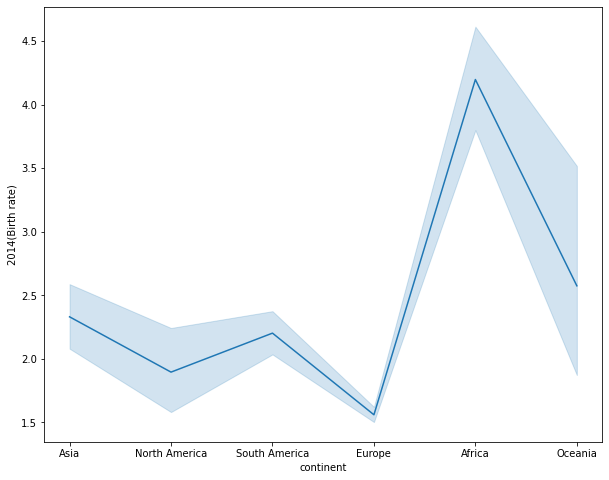

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=birth, x="continent", y="2014(Birth rate)")

In [334]:
birth.groupby('continent')['2014(Birth rate)'].mean()   

continent
Africa           4.196957
Asia             2.330886
Europe           1.560514
North America    1.896000
Oceania          2.574750
South America    2.202565
Name: 2014(Birth rate), dtype: float64

Africa의 평균출산율은 4.20, Asia의 평균출산율은 2.33, Europe의 평균출산율은 1.56,
North America의 평균출산율은 1.90, Oceania의 평균출산율은 2.57, South America의 평균 출산율은 2.20으로 나왔습니다.

그래프 사이즈를 가로 10 세로 8로 지정해주고
x축에 continent, y축에 2018(Birth rate) 값을 넣어준 후 선그래프를 그려봅니다.

<AxesSubplot:xlabel='continent', ylabel='2018(Birth rate)'>

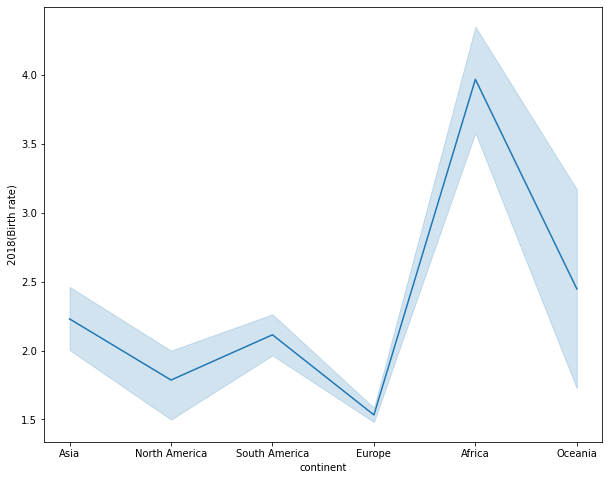

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=birth, x="continent", y="2018(Birth rate)")

In [335]:
birth.groupby('continent')['2018(Birth rate)'].mean()

continent
Africa           3.967435
Asia             2.229457
Europe           1.532919
North America    1.786000
Oceania          2.447000
South America    2.114130
Name: 2018(Birth rate), dtype: float64

In [ ]:
Africa의 평균출산율은 3.97, Asia의 평균출산율은 2.23, Europe의 평균출산율은 1.533,
North America의 평균출산율은 1.79, Oceania의 평균출산율은 2.44, South America의 평균 출산율은 2.11으로 나왔습니다.
2014년보다 평균적으로 봤을때 출산율이 줄어듬을 확인할 수 있었습니다.
전세계적으로 출산율은 줄어들고 고령화가 진행 되가고 있군요...

In [333]:
birth['2018(Birth rate)'].describe().T

count    125.000000
mean       2.318168
std        1.033355
min        0.977000
25%        1.600000
50%        1.987000
75%        2.761000
max        5.519000
Name: 2018(Birth rate), dtype: float64

In [ ]:
마지막으로 describe().T 를 이용해 2018년도의 수치형 데이터의 기술 통계를 구해보니 제일 적은 